# Sile v ležajih - numerično

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
%matplotlib inline

In [83]:
rho = 3200. # density
e = 0.0001 # excentricity
a = 0.16
b = 0.16

t1 = 0.17
R = 0.45
g = 9.81
alfa = 10.
omega0 = 2024.2

t0 = 16*1/omega0
time, dt = np.linspace(0, t0, 1000, retstep=True)

In [84]:
J = np.pi*rho*R**4*t1/2
m = np.pi*R**2*t1*rho

In [86]:
phi = omega0*np.array(time) + alfa*np.array(time)**2/2

In [87]:
Fc = m*e*np.gradient(phi, dt)**2
Ft = m*e*np.gradient(np.gradient(phi, dt), dt)
Jxz = m*a*e
Jyz = 0

In [89]:
Ax = []
Bx = []
Ay = []
By = []
for i in range(len(time)):
    coeff = [[1, 1, 0, 0],
         [0, 0, 1, 1],
         [0, 0, 0, -(a+b)],
         [0, (a+b), 0, 0]]
    bs = [-Fc[i],
         Ft[i],
         -Jxz*np.gradient(np.gradient(phi, dt), dt)[i] + (Jyz*np.gradient(phi, dt)**2)[i],
         -(Jxz*np.gradient(phi, dt)**2)[i] - Jyz*np.gradient(np.gradient(phi, dt), dt)[i]]
    _Ax, _Bx, _Ay, _By = np.linalg.solve(coeff, bs)
    Ax.append(_Ax)
    Bx.append(_Bx)
    Ay.append(_Ay)
    By.append(_By)

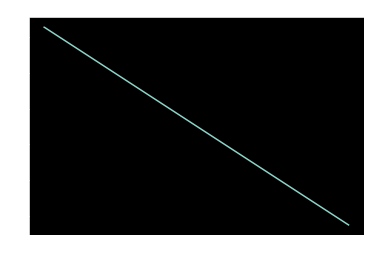

In [92]:
plt.plot(Bx)

In [96]:
Ax1 = 1/2*m*g + Ax*np.cos(phi) - Ay*np.sin(phi)
Ay1 = Ax*np.sin(phi) + Ay*np.cos(phi)
Bx1 = 1/2*m*g + Bx*np.cos(phi) - By*np.sin(phi)
By1 = Bx*np.sin(phi) + By*np.cos(phi)

(0, 0.008299575140796364)

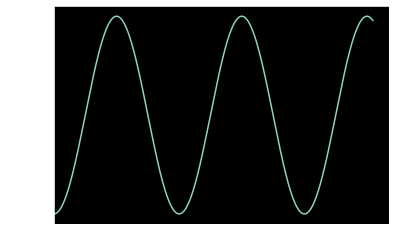

In [97]:
plt.plot(time, Ax1)
plt.xlim(left=0)